In [12]:
%autosave 60

Autosaving every 60 seconds


In [13]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [14]:
from qiskit.quantum_info import entropy, DensityMatrix

In [15]:
%run init-qiskit.ipynb

ibmqfactory.load_account:WARNING:2023-05-23 16:09:42,785: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-05-23 16:09:49,075: Credentials are already in use. The existing account in the session will be replaced.


ibm_peekskill                ibm_perth                    ibm_nairobi
-------------                ---------                    -----------
Num. Qubits:  27             Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 36             Pending Jobs: 123            Pending Jobs: 184
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      351.6          Avg. T1:      164.7          Avg. T1:      114.1
Avg. T2:      320.2          Avg. T2:      149.5          Avg. T2:      76.5



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 177            Pending Jobs: 9              Pending Jobs: 80
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True          

In [16]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [17]:
%run init-qiskit_optical_elements.ipynb

In [18]:
import sys
import time
import winsound

In [19]:
device = provider.get_backend('ibm_nairobi')

# Irrealidade dos átomos fora do IMZ

## BBO$_{p}$ - QWP$_{in}$

In [20]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
Irr_WZ_in                = np.zeros(th.shape[0])
Irr_WZ_out               = np.zeros(th.shape[0])
jobs_ids_WZ_in = []; jobs_ids_WZ_out = []

<img src = 'setup_realism.jpg' width = '90%'>

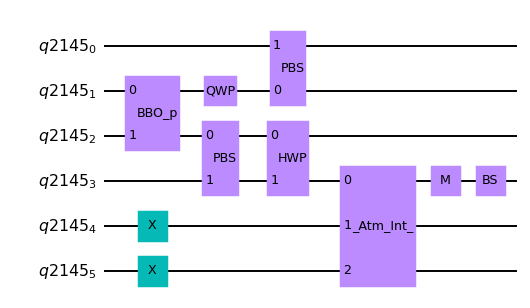

In [21]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

In [38]:
print(device)
start_time = time.time()
try:
    try:
        j=8
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        #
        j=10
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        #
    except:
        print("\n\nErro detectado: ", sys.exc_info()[1])
        print("\n")
        j=8
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        #
        j=10
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        #
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi
j =  8  - theta = 1.2566370614359172
chn3b4iae4cj9gde7ot0
Job Status: job is queued (None)

Erro detectado:  "'400 Client Error: Bad Request for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/chn3b4iae4cj9gde7ot0/status/v/1. Error in runtime client calling method getJob: Error executing GET https://runtime-us-east.quantum-computing.ibm.com/jobs/chn3b4iae4cj9gde7ot0 {No request body}, Error code: 2413.'"



j =  8  - theta = 1.2566370614359172
chn48fqae4cj9gdf1r9g
Job Status: job has successfully run
Tempo de execução: {'CREATING': datetime.datetime(2023, 5, 24, 14, 7, 8, 381000, tzinfo=tzlocal())}
j =  8  - theta = 1.2566370614359172
j = 10  - theta = 1.5707963267948966
chn66ajn6lo4mve484cg
Job Status: job has successfully run
Tempo de execução: {'CREATING': datetime.datetime(2023, 5, 24, 16, 19, 3, 274000, tzinfo=tzlocal())}
j = 10  - theta = 1.5707963267948966


In [39]:
execution_time_seg = end_time2 - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 13240.24 segundos
Tempo de execução: 220.67 minutos
Tempo de execução: 3.68 horas
Tempo de execução por job: 0.37 horas 


In [40]:
print(device)
start_time = time.time()
try:
    try:
        j=8
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]+0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        #
        j=10
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]+0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        #
    except:
        print("\n\nErro detectado: ", sys.exc_info()[1])
        print("\n")
        j=8
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]+0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        #
        j=10
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]+0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        #
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi
j =  8  - theta = 1.2566370614359172
chn73tknsmp20v4mvilg
Job Status: job has successfully run
Tempo de execução: {'CREATING': datetime.datetime(2023, 5, 24, 17, 22, 11, 872000, tzinfo=tzlocal())}

j =  8  - theta = 1.2566370614359172

j = 10  - theta = 1.5707963267948966
chn79n4nsmp20v4n6l2g
Job Status: job is queued (None)

Erro detectado:  "'400 Client Error: Bad Request for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/chn79n4nsmp20v4n6l2g/status/v/1. Error in runtime client calling method getJob: Error executing GET https://runtime-us-east.quantum-computing.ibm.com/jobs/chn79n4nsmp20v4n6l2g {No request body}, Error code: 2413.'"



j =  8  - theta = 1.2566370614359172
chn7e8m21vj7u8g2mij0
Job Status: job is queued (None)

Erro detectado:  


In [41]:
execution_time_seg = end_time2 - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 1404.95 segundos
Tempo de execução: 23.42 minutos
Tempo de execução: 0.39 horas
Tempo de execução por job: 0.05 horas 


In [42]:
print(device)
start_time = time.time()
try:
    try:
        j=8
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]-0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        #
        j=10
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]-0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        #
    except:
        print("\n\nErro detectado: ", sys.exc_info()[1])
        print("\n")
        j=8
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]-0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        #
        j=10
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]-0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        #
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi
j =  8  - theta = 1.2566370614359172
chn7f8cnsmp20v4ndlsg
Job Status: job has successfully run
Tempo de execução: {'CREATING': datetime.datetime(2023, 5, 24, 17, 46, 20, 978000, tzinfo=tzlocal())}

j =  8  - theta = 1.2566370614359172

j = 10  - theta = 1.5707963267948966
chn7ps78rmtc64pmq6b0
Job Status: job is queued (None)

Erro detectado:  "'400 Client Error: Bad Request for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/chn7ps78rmtc64pmq6b0/status/v/1. Error in runtime client calling method getJob: Error executing GET https://runtime-us-east.quantum-computing.ibm.com/jobs/chn7ps78rmtc64pmq6b0 {No request body}, Error code: 2413.'"



j =  8  - theta = 1.2566370614359172
chn7qeinajhpa63gr0jg
Job Status: job is queued (None)

Erro detectado:  "'400 Client Error: Bad Request for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/chn7qeinajhpa63gr0jg/status/v/1. Error in runtime 

In [43]:
execution_time_seg = end_time2 - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 3426.62 segundos
Tempo de execução: 57.11 minutos
Tempo de execução: 0.95 horas
Tempo de execução por job: 0.12 horas 


In [44]:
print(device)
start_time = time.time()
try:
    try:
        j=10
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]-0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
        #
    except:
        j=10
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
        #
        # Circuit
        #
        qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]-0.003); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
        #
        # Tomography
        #
        qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
        job = qiskit.execute(qstc, backend = device, shots=nshots)
        print(job.job_id()); job_monitor(job)
        execution_time = job.time_per_step()
        print("Tempo de execução:", execution_time)
        jobs_ids_WZ_in.append(job.job_id())
        qstf = StateTomographyFitter(job.result(), qstc)
        #
        # rho
        #
        rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
        print('j = {:2d}  - theta = {}'.format(j, th[j]))
        #
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi

j = 10  - theta = 1.5707963267948966
chn93t0uhh1ldco1nm40
Job Status: job is queued (None)j = 10  - theta = 1.5707963267948966


Erro detectado:  


In [45]:
execution_time_seg = end_time2 - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 7186.31 segundos
Tempo de execução: 119.77 minutos
Tempo de execução: 2.0 horas
Tempo de execução por job: 0.2 horas 


In [31]:
jobs_ids_WZ_in

['chflp5g4sb77opise4h0',
 'chfmupf9targ2vqg4ovg',
 'chfn93vppn69h5qgh9bg',
 'chfq84nppn69h5qidi8g',
 'chfu8ar66hmpifvk570g',
 'chg26i84sb77opj32t40',
 'chg4bpj66hmpifvmr7cg',
 'chg4vseo5i9gdbbtoivg',
 'chg5jrnppn69h5qnm5i0',
 'chg9h2vppn69h5qps3r0',
 'chg9vh04sb77opj7690g',
 'chga4deo5i9gdbc0mbg0',
 'chgaab7ppn69h5qqcmcg',
 'chgafor66hmpifvq95t0',
 'chgak7g4sb77opj7jo0g',
 'chgaqmf9targ2vqqk010',
 'chgb26g4sb77opj7sjjg',
 'chgb6c4p8f687ohg1q3g',
 'chgbb9j66hmpifvqqjdg',
 'chgdhefppn69h5qsdej0',
 'chgfdug4sb77opjalt90']

In [13]:
f = open("jobs_ids_WZ_in.txt", "w")
f.write(str(jobs_ids_WZ_in))
f.close()

### Retrieve

In [12]:
f = open("jobs_ids_WZ_in.txt","r")
list_ids_WZ_in_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [14]:
list_ids_WZ_in_, len(list_ids_WZ_in_)

(['chflp5g4sb77opise4h0',
  'chfmupf9targ2vqg4ovg',
  'chfn93vppn69h5qgh9bg',
  'chfq84nppn69h5qidi8g',
  'chfu8ar66hmpifvk570g',
  'chg26i84sb77opj32t40',
  'chg4bpj66hmpifvmr7cg',
  'chg4vseo5i9gdbbtoivg',
  'chg5jrnppn69h5qnm5i0',
  'chg9h2vppn69h5qps3r0',
  'chg9vh04sb77opj7690g',
  'chga4deo5i9gdbc0mbg0',
  'chgaab7ppn69h5qqcmcg',
  'chgafor66hmpifvq95t0',
  'chgak7g4sb77opj7jo0g',
  'chgaqmf9targ2vqqk010',
  'chgb26g4sb77opj7sjjg',
  'chgb6c4p8f687ohg1q3g',
  'chgbb9j66hmpifvqqjdg',
  'chgdhefppn69h5qsdej0',
  'chgfdug4sb77opjalt90'],
 21)

In [15]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
ret_rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
ret_rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
ret_Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
ret_Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
ret_Irr_WZ_in                = np.zeros(th.shape[0])
ret_Irr_WZ_out               = np.zeros(th.shape[0])
jobs_ids_WZ_in = []; jobs_ids_WZ_out = []

In [16]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_in_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_WZ_in = device.retrieve_job(list_ids_WZ_in_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_WZ_in.job_id())
    qstf = StateTomographyFitter(job_ret_WZ_in.result(), qstc)
    #
    # rho
    #
    ret_rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chflp5g4sb77opise4h0
chflp5g4sb77opise4h0
j =  0  - theta = 0.0
chfmupf9targ2vqg4ovg
chfmupf9targ2vqg4ovg
j =  1  - theta = 0.15707963267948966
chfn93vppn69h5qgh9bg
chfn93vppn69h5qgh9bg
j =  2  - theta = 0.3141592653589793
chfq84nppn69h5qidi8g
chfq84nppn69h5qidi8g
j =  3  - theta = 0.47123889803846897
chfu8ar66hmpifvk570g
chfu8ar66hmpifvk570g
j =  4  - theta = 0.6283185307179586
chg26i84sb77opj32t40
chg26i84sb77opj32t40
j =  5  - theta = 0.7853981633974483
chg4bpj66hmpifvmr7cg
chg4bpj66hmpifvmr7cg
j =  6  - theta = 0.9424777960769379
chg4vseo5i9gdbbtoivg
chg4vseo5i9gdbbtoivg
j =  7  - theta = 1.0995574287564276
chg5jrnppn69h5qnm5i0
chg5jrnppn69h5qnm5i0
j =  8  - theta = 1.2566370614359172
chg9h2vppn69h5qps3r0
chg9h2vppn69h5qps3r0
j =  9  - theta = 1.413716694115407
chg9vh04sb77opj7690g
chg9vh04sb77opj7690g
j = 10  - theta = 1.5707963267948966
chga4deo5i9gdbc0mbg0
chga4deo5i9gdbc0mbg0
j = 11  - theta = 1.7278759594743862
chgaab7ppn69h5qqcmcg
chgaab7ppn69h5qqcmcg
j = 12  - th

### Cálculos

#### QWP$_{in}$

In [22]:
for j in range(0,d):
    ret_rhoWZ_00WZ_in[j] = projM_np(4, '00', ret_rhoWZ_AbWZ_in[j])
    ret_Phi_WZ_00WZ_in[j] = dephasing_map_2qubits_np(ret_rhoWZ_00WZ_in[j])
    ret_Irr_WZ_in[j] = entropy(ret_Phi_WZ_00WZ_in[j]) - entropy(ret_rhoWZ_00WZ_in[j])
    print(ret_Irr_WZ_in[j])

0.024420550505978245
0.05733418121856726
0.1333744000036895
0.21022785866895555
0.2841335172323498
0.36763341335472643
0.4227482538229752
0.4307531447131727
0.42883546546386464
0.4856804857055659
0.4191968610631909
0.36736475710016636
0.23101635290130373
0.2095876168225117
0.14596856189614593
0.14703762708140078
0.05534093262043516
0.04230139529900967
0.021099727929467904
0.02569834393920778
0.03390183138298353


### Simulation

In [23]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
sim_rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
sim_rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
sim_Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
sim_Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
sim_Irr_WZ_in                = np.zeros(th.shape[0])
sim_Irr_WZ_out               = np.zeros(th.shape[0])

<img src = 'setup_realism.jpg' width = '90%'>

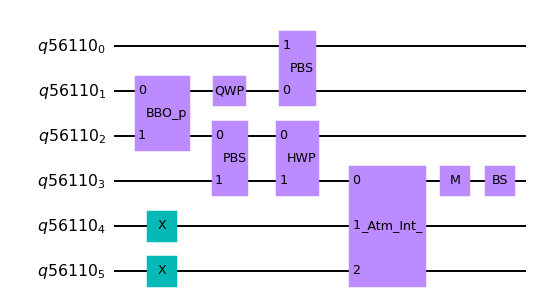

In [24]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

In [25]:
for j in range(0,d):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuit
    #
    qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomography
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    jobs_ids_WZ_in.append(job.job_id())
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    sim_rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.0
j =  1  - theta = 0.15707963267948966
j =  2  - theta = 0.3141592653589793
j =  3  - theta = 0.47123889803846897
j =  4  - theta = 0.6283185307179586
j =  5  - theta = 0.7853981633974483
j =  6  - theta = 0.9424777960769379
j =  7  - theta = 1.0995574287564276
j =  8  - theta = 1.2566370614359172
j =  9  - theta = 1.413716694115407
j = 10  - theta = 1.5707963267948966
j = 11  - theta = 1.7278759594743862
j = 12  - theta = 1.8849555921538759
j = 13  - theta = 2.0420352248333655
j = 14  - theta = 2.199114857512855
j = 15  - theta = 2.356194490192345
j = 16  - theta = 2.5132741228718345
j = 17  - theta = 2.670353755551324
j = 18  - theta = 2.827433388230814
j = 19  - theta = 2.9845130209103035
j = 20  - theta = 3.141592653589793


### Cálculos

#### QWP$_{in}$

In [26]:
for j in range(0,d):
    sim_rhoWZ_00WZ_in[j] = projM_np(4, '00', sim_rhoWZ_AbWZ_in[j])
    sim_Phi_WZ_00WZ_in[j] = dephasing_map_2qubits_np(sim_rhoWZ_00WZ_in[j])
    sim_Irr_WZ_in[j] = entropy(sim_Phi_WZ_00WZ_in[j]) - entropy(sim_rhoWZ_00WZ_in[j])
    print(sim_Irr_WZ_in[j])

0.001755080401836133
0.059943430972134046
0.16271519088465297
0.2967846431106675
0.43860294958693014
0.5807737468291072
0.7101818661218903
0.8229066455462289
0.9024423068751737
0.957210777927237
0.9690799759990308
0.9657914910366963
0.9129017547716627
0.8190491980326842
0.7056069253730791
0.5860723471580642
0.45427586871836273
0.3024483212464364
0.1638529290700955
0.06303072246408886
0.0023820618456301956


## BBO$_{p}$ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

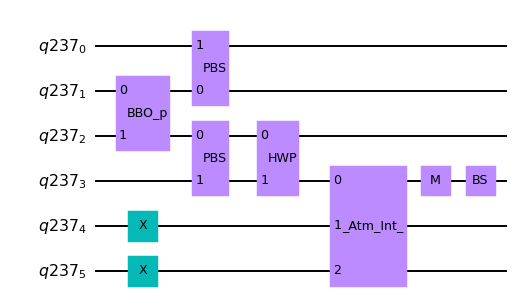

In [15]:
def qc_QCRWZ_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                          # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_out_ = qc_QCRWZ_out(math.pi); qc_QCRWZ_out_.draw(output = 'mpl', scale = 0.7)

In [ ]:
print(device)
start_time = time.time()
try:
    try:
        for j in range(0,d):
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id()); job_monitor(job)
            execution_time = job.time_per_step()
            print("Tempo de execução:", execution_time)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
    except:
        k = j
        print('---------------------------------------')
        print('\ntryexcept, k = ', k)
        for j in range(k,d):
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id()); job_monitor(job)
            execution_time = job.time_per_step()
            print("Tempo de execução:", execution_time)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

j = 0 - 'chgnhbfppn69h5r1qlkg'


j = 1 - 'chgumofppn69h5r5idhg'

In [90]:
print(device)
start_time2 = time.time()
try:
    try:
        print('\n---------------------------------------')
        print('\nTry-Try')
        for j in range(2,d):
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            print("Tempo de execução:", job.time_per_step())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
    except:
        k = j
        print('\n---------------------------------------')
        print('\nTry-Except, k = ', k)
        for j in range(k,d):
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            print("Tempo de execução:", job.time_per_step())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi

---------------------------------------

Try-Try
chhcchnppn69h5rfrs60
job creation time 2023-05-15 20:54:44.243000-03:00
Job Status: job has successfully run
Tempo de execução: {'CREATING': datetime.datetime(2023, 5, 15, 20, 54, 43, 992000, tzinfo=tzlocal())}
j =  2  - theta = 0.3141592653589793
chhf2ov9targ2vrhna0g
job creation time 2023-05-15 23:58:41.206000-03:00
Job Status: job is queued (None)
---------------------------------------

Try-Except, k =  3
chhfhn7ppn69h5ri4o8g
job creation time 2023-05-16 00:30:34.513000-03:00
Job Status: job is queued (None)

Erro detectado:  "'400 Client Error: Bad Request for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/chhfhn7ppn69h5ri4o8g/status/v/1. Error in runtime client calling method getJob: Error executing GET https://runtime-us-east.quantum-computing.ibm.com/jobs/chhfhn7ppn69h5ri4o8g {No request body}, Error code: 2413.'"


In [94]:
execution_time2_seg = end_time2 - start_time2
print("Tempo de execução:", round(execution_time2_seg, 2), "segundos")
execution_time2_min = execution_time2_seg/60
print("Tempo de execução:", round(execution_time2_min, 2), "minutos")
execution_time2_h = execution_time2_min/60
print("Tempo de execução:", round(execution_time2_h, 2), "horas")
execution_time2_1_h = execution_time2_h/j
print("Tempo de execução por job:", round(execution_time2_1_h, 2), "horas ")

Tempo de execução: 24509.26 segundos
Tempo de execução: 408.49 minutos
Tempo de execução: 6.81 horas
Tempo de execução por job: 2.27 horas 


In [105]:
print(device)
start_time2 = time.time()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time())))
try:
    try:
        print('\n---------------------------------------')
        print('\nTry-Try')
        for j in range(3,d):
            print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
    except:
        k = j
        print('\n---------------------------------------')
        print('\nTry-Except, k = ', k)
        for j in range(k,d):
            print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time: ', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time2 = time.time()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time())))
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi

---------------------------------------

Try-Try
j =  3  - theta = 0.47123889803846897
chhr8t9ike34bjm3qjc0
job creation time 2023-05-16 13:50:58.886000-03:00
Job Status: job is queued (None)
---------------------------------------

Try-Except, k =  3
j =  3  - theta = 0.47123889803846897
chhrl12ae4cj9g89p1g0
job creation time 2023-05-16 14:16:51.452000-03:00
Job Status: job has successfully run
Tempo de execução: {'CREATING': datetime.datetime(2023, 5, 16, 14, 16, 51, 3000, tzinfo=tzlocal())}
j =  3  - theta = 0.47123889803846897
j =  4  - theta = 0.6283185307179586
chhsgk46f7i49rudfnf0
job creation time 2023-05-16 15:15:42.397000-03:00
Job Status: job has successfully run
Tempo de execução: {'CREATING': datetime.datetime(2023, 5, 16, 15, 15, 41, 995000, tzinfo=tzlocal())}
j =  4  - theta = 0.6283185307179586
j =  5  - theta = 0.7853981633974483
chhsiviae4cj9g8b6ls0
job creation time 2023-05-16 15:20:44.723000-03:00
Job Status: job has successfully run
Tempo de execução: 

In [108]:
execution_time2_seg = end_time2 - start_time2
print("Tempo de execução:", round(execution_time2_seg, 2), "segundos")
execution_time2_min = execution_time2_seg/60
print("Tempo de execução:", round(execution_time2_min, 2), "minutos")
execution_time2_h = execution_time2_min/60
print("Tempo de execução:", round(execution_time2_h, 2), "horas")
execution_time2_1_h = execution_time2_h/j
print("Tempo de execução por job:", round(execution_time2_1_h, 2), "horas ")

Tempo de execução: 6309.65 segundos
Tempo de execução: 105.16 minutos
Tempo de execução: 1.75 horas
Tempo de execução por job: 0.29 horas 


In [110]:
print(device)
start_time = time.time()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time())))
try:
    try:
        print('\n---------------------------------------')
        print('\nTry-Try')
        for j in range(6,d):
            print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
    except:
        k = j
        print('\n---------------------------------------')
        print('\nTry-Except, k = ', k)
        for j in range(k,d):
            print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time: ', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time())))
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi
2023-05-16 15:42:34

---------------------------------------

Try-Try

j =  6  - theta = 0.9424777960769379
chhst86pqnphtdr8mgm0
job creation time 2023-05-16 15:42:37.369000-03:00
Job Status: job has successfully run
j =  6  - theta = 0.9424777960769379

j =  7  - theta = 1.0995574287564276
chhsvdepqnphtdr8psa0
job creation time 2023-05-16 15:47:15.851000-03:00
Job Status: job has successfully run
j =  7  - theta = 1.0995574287564276

j =  8  - theta = 1.2566370614359172
chht2746f7i49rueb0i0
job creation time 2023-05-16 15:53:14.202000-03:00
Job Status: job has successfully run
j =  8  - theta = 1.2566370614359172

j =  9  - theta = 1.413716694115407
chht4bc6f7i49ruee6o0
job creation time 2023-05-16 15:57:48.082000-03:00
Job Status: job has successfully run
j =  9  - theta = 1.413716694115407

j = 10  - theta = 1.5707963267948966
chhtafj7ca17j320kbe0
job creation time 2023-05-16 16:10:52.736000-03:00
Job Status: job has successfully run
j = 10  - theta = 1.5707963267948966


In [111]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 12754.54 segundos
Tempo de execução: 212.58 minutos
Tempo de execução: 3.54 horas
Tempo de execução por job: 0.21 horas 


In [122]:
print(device)
start_time = time.time()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time())))
try:
    try:
        print('\n---------------------------------------')
        print('\nTry-Try')
        for j in range(17,d):
            print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
    except:
        k = j
        print('\n---------------------------------------')
        print('\nTry-Except, k = ', k)
        for j in range(k,d):
            print('\nj = {:2d}  - theta = {}'.format(j, th[j]))
            qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
            #
            # Circuit
            #
            qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
            #
            # Tomography
            #
            qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
            job = qiskit.execute(qstc, backend = device, shots=nshots)
            print(job.job_id())
            print('job creation time: ', job.creation_date())
            job_monitor(job)
            jobs_ids_WZ_out.append(job.job_id())
            qstf = StateTomographyFitter(job.result(), qstc)
            #
            # rho
            #
            rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
            print('j = {:2d}  - theta = {}'.format(j, th[j]))
except:
    print("\n\nErro detectado: ", sys.exc_info()[1])
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
    winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
end_time = time.time()
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(time.time())))
winsound.Beep(1000, 1000)  # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms
winsound.Beep(1000, 200)   # Frequência de 1000 Hz e duração de 200 ms

ibm_nairobi
2023-05-17 08:41:39

---------------------------------------

Try-Try

j = 17  - theta = 2.670353755551324
chibquqae4cj9g8vdkhg
job creation time 2023-05-17 08:41:43.186000-03:00
Job Status: job has successfully run
j = 17  - theta = 2.670353755551324

j = 18  - theta = 2.827433388230814
chicjdc6f7i49rv352qg
job creation time 2023-05-17 09:33:55.210000-03:00
Job Status: job has successfully run
j = 18  - theta = 2.827433388230814

j = 19  - theta = 2.9845130209103035
chiclkmpqnphtdrtq760
job creation time 2023-05-17 09:38:41.187000-03:00
Job Status: job is actively running
---------------------------------------

Try-Except, k =  19

j = 19  - theta = 2.9845130209103035
chicn0k6f7i49rv38pp0
job creation time:  2023-05-17 09:41:37.033000-03:00
Job Status: job has successfully run
j = 19  - theta = 2.9845130209103035

j = 20  - theta = 3.141592653589793
chicqmc6f7i49rv3cip0
job creation time:  2023-05-17 09:49:27.537000-03:00
Job Status: job has successfully run
j = 20  - the

In [123]:
execution_time_seg = end_time - start_time
print("Tempo de execução:", round(execution_time_seg, 2), "segundos")
execution_time_min = execution_time_seg/60
print("Tempo de execução:", round(execution_time_min, 2), "minutos")
execution_time_h = execution_time_min/60
print("Tempo de execução:", round(execution_time_h, 2), "horas")
execution_time_1_h = execution_time_h/j
print("Tempo de execução por job:", round(execution_time_1_h, 2), "horas ")

Tempo de execução: 4368.63 segundos
Tempo de execução: 72.81 minutos
Tempo de execução: 1.21 horas
Tempo de execução por job: 0.06 horas 


In [19]:
jobs_ids_WZ_out

['chgnhbfppn69h5r1qlkg',
 'chgumofppn69h5r5idhg',
 'chhcchnppn69h5rfrs60',
 'chhrl12ae4cj9g89p1g0',
 'chhsgk46f7i49rudfnf0',
 'chhsiviae4cj9g8b6ls0',
 'chhst86pqnphtdr8mgm0',
 'chhsvdepqnphtdr8psa0',
 'chht2746f7i49rueb0i0',
 'chht4bc6f7i49ruee6o0',
 'chhtafj7ca17j320kbe0',
 'chhtr4upqnphtdra5t70',
 'chhtt7mpqnphtdra9770',
 'chhuie6pqnphtdrbcig0',
 'chhut52ae4cj9g8es5m0',
 'chhv4epike34bjm9vc1g',
 'chhvht6pqnphtdrd1un0',
 'chibquqae4cj9g8vdkhg',
 'chicjdc6f7i49rv352qg',
 'chicn0k6f7i49rv38pp0',
 'chicqmc6f7i49rv3cip0']

In [20]:
f = open("jobs_ids_WZ_out.txt", "w")
f.write(str(jobs_ids_WZ_out))
f.close()

In [17]:
f = open("jobs_ids_WZ_out.txt","r")
list_ids_WZ_out_ = f.read().replace("'","").replace(" ","").replace("[","").replace("]","").split(",")
f.close()

In [18]:
list_ids_WZ_out_, len(list_ids_WZ_out_)

(['chgnhbfppn69h5r1qlkg',
  'chgumofppn69h5r5idhg',
  'chhcchnppn69h5rfrs60',
  'chhrl12ae4cj9g89p1g0',
  'chhsgk46f7i49rudfnf0',
  'chhsiviae4cj9g8b6ls0',
  'chhst86pqnphtdr8mgm0',
  'chhsvdepqnphtdr8psa0',
  'chht2746f7i49rueb0i0',
  'chht4bc6f7i49ruee6o0',
  'chhtafj7ca17j320kbe0',
  'chhtr4upqnphtdra5t70',
  'chhtt7mpqnphtdra9770',
  'chhuie6pqnphtdrbcig0',
  'chhut52ae4cj9g8es5m0',
  'chhv4epike34bjm9vc1g',
  'chhvht6pqnphtdrd1un0',
  'chibquqae4cj9g8vdkhg',
  'chicjdc6f7i49rv352qg',
  'chicn0k6f7i49rv38pp0',
  'chicqmc6f7i49rv3cip0'],
 21)

### Retrieve

In [40]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_out_[j])
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    job_ret_WZ_out = device.retrieve_job(list_ids_WZ_out_[j])
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    print(job_ret_WZ_out.job_id())
    qstf = StateTomographyFitter(job_ret_WZ_out.result(), qstc)
    #
    # rho
    #
    ret_rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chgnhbfppn69h5r1qlkg
chgnhbfppn69h5r1qlkg
j =  0  - theta = 0.0
chgumofppn69h5r5idhg
chgumofppn69h5r5idhg
j =  1  - theta = 0.15707963267948966
chhcchnppn69h5rfrs60
chhcchnppn69h5rfrs60
j =  2  - theta = 0.3141592653589793
chhrl12ae4cj9g89p1g0
chhrl12ae4cj9g89p1g0
j =  3  - theta = 0.47123889803846897
chhsgk46f7i49rudfnf0
chhsgk46f7i49rudfnf0
j =  4  - theta = 0.6283185307179586
chhsiviae4cj9g8b6ls0
chhsiviae4cj9g8b6ls0
j =  5  - theta = 0.7853981633974483
chhst86pqnphtdr8mgm0
chhst86pqnphtdr8mgm0
j =  6  - theta = 0.9424777960769379
chhsvdepqnphtdr8psa0
chhsvdepqnphtdr8psa0
j =  7  - theta = 1.0995574287564276
chht2746f7i49rueb0i0
chht2746f7i49rueb0i0
j =  8  - theta = 1.2566370614359172
chht4bc6f7i49ruee6o0
chht4bc6f7i49ruee6o0
j =  9  - theta = 1.413716694115407
chhtafj7ca17j320kbe0
chhtafj7ca17j320kbe0
j = 10  - theta = 1.5707963267948966
chhtr4upqnphtdra5t70
chhtr4upqnphtdra5t70
j = 11  - theta = 1.7278759594743862
chhtt7mpqnphtdra9770
chhtt7mpqnphtdra9770
j = 12  - th

### Cálculos

#### QWP$_{out}$

In [42]:
for j in range(0,d):
    ret_rhoWZ_00WZ_out[j] = projM_np(4, '00', ret_rhoWZ_AbWZ_out[j])
    ret_Phi_WZ_00WZ_out[j] = dephasing_map_2qubits_np(ret_rhoWZ_00WZ_out[j])
    ret_Irr_WZ_out[j] = entropy(ret_Phi_WZ_00WZ_out[j]) - entropy(ret_rhoWZ_00WZ_out[j])
    print(ret_Irr_WZ_out[j])

0.01948159624241863
0.020671786785510737
0.05599711023869869
0.03541809460564793
0.05042617687790507
0.046583070594177545
0.050871770035786246
0.06728050262806273
0.08121746100671101
0.0839476659478936
0.0812228761202618
0.10913381885059614
0.1219982462817435
0.13030689187057032
0.17091649801483588
0.22255161572987592
0.17790318047525933
0.14253369545890204
0.08981764987351859
0.054557903201740254
0.05734237598793768


In [28]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
the_Irr_WZ_in                 = np.zeros(th.shape[0])
the_Irr_WZ_out                = np.zeros(th.shape[0])

In [29]:
for j in range(0,d):
    c_plus = np.cos(th[j]/2)
    c_minus = np.sqrt(1 - c_plus**2)
    the_Irr_WZ_in[j] = -1.0 * c_plus**2 * np.log2(1.0 * c_plus**2) - c_minus**2 * np.log2(c_minus**2)
    the_Irr_WZ_out[j] = 0
    print(the_Irr_WZ_in[j])

0.00041825654974191235
0.05960827160488702
0.1732975820045815
0.3131570775169316
0.4621607944535125
0.607604014273341
0.7394634336049204
0.849811316538504
0.932583510389106
0.9834895100553851
0.9999819663871292
0.9812490235560026
0.9282133180193721
0.8435331680632676
0.7316110586657141
0.5986265342290418
0.45263200118252755
0.30379873295430637
0.1650395819160478
0.05377438056525288
4.038739397709968e-31


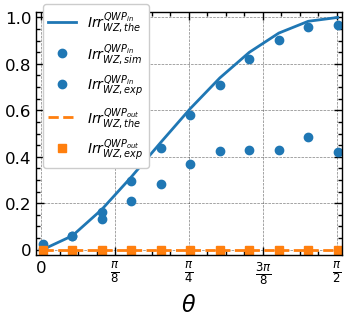

In [43]:
import string
plt.figure(figsize = (6.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#sim_Irr_WZ_in
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{WZ, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], sim_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{WZ, sim}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{WZ, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{WZ,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], ret_Irr_WZ_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{WZ,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(0.195, 0.695), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([-0.025, np.pi/2+0.025])
plt.ylim([-0.025, 1.025])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

# Mitigação

In [46]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [54]:
start_time1_mit = time.time()
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [0,1,2,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job = qiskit.execute(meas_calibs, backend = device, shots = nshots)
print(job.job_id())
job_monitor(job)
meas_fitter = CompleteMeasFitter(job.result(), state_labels)
end_time1_mit = time.time()

ibm_nairobi
chjna946f7i49ron2c4g
Job Status: job is queued (None)

IBMQJobApiError: "'400 Client Error: Bad Request for url: https://api.quantum-computing.ibm.com/api/Network/ibm-q/Groups/open/Projects/main/Jobs/chjna946f7i49ron2c4g/status/v/1. Error in runtime client calling method getJobMetrics: Error executing GET https://runtime-us-east.quantum-computing.ibm.com/jobs/chjna946f7i49ron2c4g/metrics {No request body}, Error code: 2413.'"

In [ ]:
execution_time1_mit_seg = end_time1_mit - start_time1_mit
print("Tempo de execução:", round(execution_time1_mit_seg, 2), "segundos")
execution_time1_mit_min = execution_time1_mit_seg/60
print("Tempo de execução:", round(execution_time1_mit_min, 2), "minutos")
execution_time1_mit_h = execution_time1_mit_min/60
print("Tempo de execução:", round(execution_time1_mit_h, 2), "horas")

## Mitigação $WZ_{in}$

### Retrieve do job da mitigação

In [44]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
mit_rhoWZ_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
mit_rhoWZ_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
mit_Phi_WZ_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
mit_Phi_WZ_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
mit_Irr_WZ_in                 = np.zeros(th.shape[0])
mit_Irr_WZ_out                = np.zeros(th.shape[0])

In [47]:
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job_ret_WZ_in = device.retrieve_job('chdn6tim9ctescqge6gg')
print(job_ret_WZ_in.job_id())
job_monitor(job_ret_WZ_in)
meas_fitter = CompleteMeasFitter(job_ret_WZ_in.result(), state_labels)

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [48]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_in_[j])
    job_ret_WZ_in = device.retrieve_job(list_ids_WZ_in_[j])
    mitigated_results_WZ_in = meas_fitter.filter.apply(job_ret_WZ_in.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_WZ_in = StateTomographyFitter(mitigated_results_WZ_in, qstc)
    print(job_ret_WZ_in.job_id())
    #
    # rho
    #
    mit_rhoWZ_AbWZ_in[j] = qstf_mit_WZ_in.fit(method='lstsq')
    #
    mit_rhoWZ_0bWZ_in[j] = projM_np(8, '0', mit_rhoWZ_AbWZ_in[j])
    mit_Phi_WZ_0bWZ_in[j] = dephasing_map_3qubits_np(mit_rhoWZ_0bWZ_in[j])
    mit_Irr_WZ_in[j] = entropy(mit_Phi_WZ_0bWZ_in[j]) - entropy(mit_rhoWZ_0bWZ_in[j])
    print(mit_Irr_WZ_in[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chflp5g4sb77opise4h0
chflp5g4sb77opise4h0
0.8447710077718652
j =  0  - theta = 0.01
chfmupf9targ2vqg4ovg
chfmupf9targ2vqg4ovg
0.8626283921832257
j =  1  - theta = 0.16657963267948966
chfn93vppn69h5qgh9bg
chfn93vppn69h5qgh9bg
0.9120939358170282
j =  2  - theta = 0.3231592653589793
chfq84nppn69h5qidi8g
chfq84nppn69h5qidi8g
0.9069090487167042
j =  3  - theta = 0.479738898038469
chfu8ar66hmpifvk570g


KeyboardInterrupt: 

## Mitigação $WZ_{out}$

### Retrieve do job da mitigação

In [61]:
print(device)
qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
qubit_list = [1,3,4,5] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job_ret_WZ_out = device.retrieve_job('chdn6tim9ctescqge6gg')
print(job_ret_WZ_out.job_id())
job_monitor(job_ret_WZ_out)
meas_fitter = CompleteMeasFitter(job_ret_WZ_out.result(), state_labels)

ibm_nairobi
chdn6tim9ctescqge6gg
Job Status: job has successfully run


In [62]:
print(device)
for j in range(0, d):
    print(list_ids_WZ_out_[j])
    job_ret_WZ_out = device.retrieve_job(list_ids_WZ_out_[j])
    mitigated_results_WZ_out = meas_fitter.filter.apply(job_ret_WZ_out.result())
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]]) # circuit for state tomography
    qstf_mit_WZ_out = StateTomographyFitter(mitigated_results_WZ_out, qstc)
    print(job_ret_WZ_out.job_id())
    #
    # rho
    #
    mit_rhoWZ_AbWZ_out[j] = qstf_mit_WZ_out.fit(method='lstsq')
    #
    mit_rhoWZ_0bWZ_out[j] = projM_np(8, '0', mit_rhoWZ_AbWZ_out[j])
    mit_Phi_WZ_0bWZ_out[j] = dephasing_map_3qubits_np(mit_rhoWZ_0bWZ_out[j])
    mit_Irr_WZ_out[j] = entropy(mit_Phi_WZ_0bWZ_out[j]) - entropy(mit_rhoWZ_0bWZ_out[j])
    print(mit_Irr_WZ_out[j])
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

ibm_nairobi
chgnhbfppn69h5r1qlkg
chgnhbfppn69h5r1qlkg
0.9073389345709242
j =  0  - theta = 0.01
chgumofppn69h5r5idhg
chgumofppn69h5r5idhg
0.9053482791464489
j =  1  - theta = 0.16657963267948966
chhcchnppn69h5rfrs60
chhcchnppn69h5rfrs60
0.9196043432963951
j =  2  - theta = 0.3231592653589793
chhrl12ae4cj9g89p1g0
chhrl12ae4cj9g89p1g0
0.9101968553223783
j =  3  - theta = 0.479738898038469
chhsgk46f7i49rudfnf0
chhsgk46f7i49rudfnf0
0.9034603342068552
j =  4  - theta = 0.6363185307179586
chhsiviae4cj9g8b6ls0
chhsiviae4cj9g8b6ls0
0.8890240608074533
j =  5  - theta = 0.7928981633974483
chhst86pqnphtdr8mgm0
chhst86pqnphtdr8mgm0
0.8829539418788822
j =  6  - theta = 0.9494777960769379
chhsvdepqnphtdr8psa0
chhsvdepqnphtdr8psa0
0.9028882330952172
j =  7  - theta = 1.1060574287564275
chht2746f7i49rueb0i0
chht2746f7i49rueb0i0
0.9258562508850345
j =  8  - theta = 1.2626370614359173
chht4bc6f7i49ruee6o0
chht4bc6f7i49ruee6o0
0.9231657382725074
j =  9  - theta = 1.419216694115407
chhtafj7ca17j320kbe0
ch

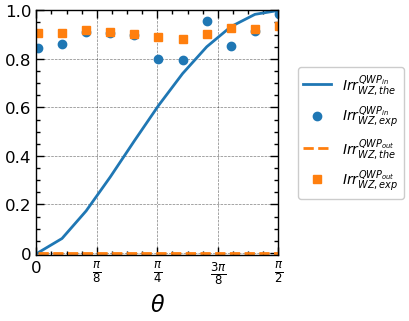

In [66]:
import string
plt.figure(figsize = (6.5, 3.2), constrained_layout = True)
#plt.subplots(figsize=(6.5, 3.2))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th[:len(th)//2+1], the_Irr_WZ_in[:len(th)//2+1], '-' ,
         color='#1f77b4', label = r'$Irr_{WZ, the}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_in[:len(th)//2+1], 'o' ,
         color='#1f77b4', label = r'$Irr_{WZ, exp}^{QWP_{in}}$')
plt.plot(th[:len(th)//2+1], the_Irr_WZ_out[:len(th)//2+1], '--',
         color='#ff7f0e', label = r'$Irr_{WZ,the}^{QWP_{out}}$')
plt.plot(th[:len(th)//2+1], mit_Irr_WZ_out[:len(th)//2+1], 's',
         color='#ff7f0e', label = r'$Irr_{WZ,exp}^{QWP_{out}}$')
#
#
plt.legend(bbox_to_anchor=(1.3,0.5), loc='center',
           borderaxespad=0, fontsize=10)
#, frameon=False, handlelength=1.5
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2]
#, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$',
           r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$']
#, r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$'
#, r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xlim([0, np.pi/2])
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
#plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()